# Covid19 Data Analysis Notebook
------------------------------------------

### Import the modules 

This is my analysis of the start of the pandemic. In it, I considered the influence of various factors on distribution and mortality. 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


### Importing covid19 dataset

In [4]:
corona_dataset = pd.read_csv("covid19_Confirmed_dataset.csv")
corona_dataset.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [7]:
corona_dataset.describe

<bound method NDFrame.describe of     Province/State         Country/Region        Lat       Long  1/22/20  \
0              NaN            Afghanistan  33.000000  65.000000        0   
1              NaN                Albania  41.153300  20.168300        0   
2              NaN                Algeria  28.033900   1.659600        0   
3              NaN                Andorra  42.506300   1.521800        0   
4              NaN                 Angola -11.202700  17.873900        0   
..             ...                    ...        ...        ...      ...   
261            NaN         Western Sahara  24.215500 -12.885800        0   
262            NaN  Sao Tome and Principe   0.186360   6.613081        0   
263            NaN                  Yemen  15.552727  48.516388        0   
264            NaN                Comoros -11.645500  43.333300        0   
265            NaN             Tajikistan  38.861034  71.276093        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...

Delete the useless columns

In [8]:
corona_dataset.drop(['Lat','Long'],axis=1, inplace=True) # geo coordinates
corona_dataset.head(10)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
5,NaN,Antigua and Barbuda,0,0,0,0,0,0,0,0,...,23,24,24,24,24,24,24,24,24,24
6,NaN,Argentina,0,0,0,0,0,0,0,0,...,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428
7,NaN,Armenia,0,0,0,0,0,0,0,0,...,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066
8,Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,...,104,104,104,105,106,106,106,106,106,106
9,New South Wales,Australia,0,0,0,0,3,4,4,4,...,2969,2971,2976,2982,2994,3002,3004,3016,3016,3025


### Aggregating the rows by the country

In [10]:
corona_dataset_aggr = corona_dataset.groupby("Country/Region").sum()
corona_dataset_aggr.head()

/var/folders/th/zkxn724n2s12m0g5bscf4trh0000gp/T/ipykernel_38493/900038656.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  corona_dataset_aggr = corona_dataset.groupby("Country/Region").sum()


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


### Visualizing data related to a country for example China, Spain and Russia

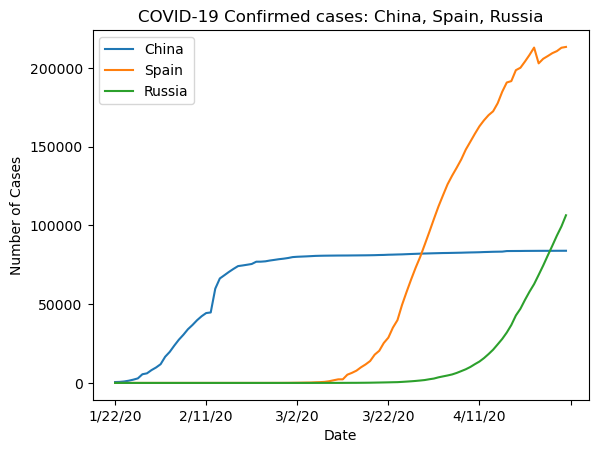

In [15]:
corona_dataset_aggr.loc['China'].plot()
corona_dataset_aggr.loc['Spain'].plot()
corona_dataset_aggr.loc['Russia'].plot()

plt.title('COVID-19 Confirmed cases: China, Spain, Russia')
plt.xlabel('Date')  # Add label to the x-axis
plt.ylabel('Number of Cases')  # Add label to the y-axis
plt.legend()

plt.show()

The beginng in China 

Text(0, 0.5, 'Number of Cases')

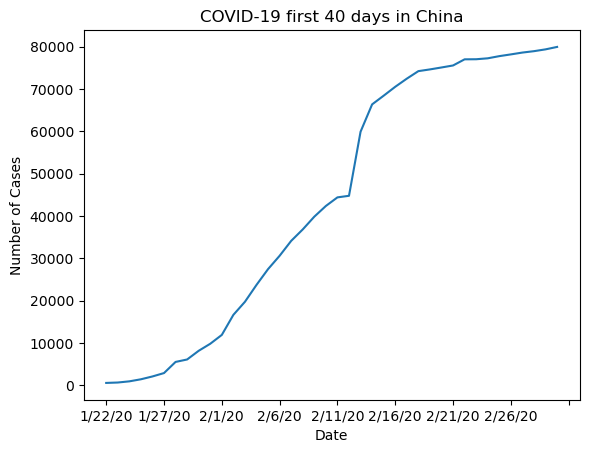

In [38]:
corona_dataset_aggr.loc['China'][:40].plot() # first 40 days 

plt.title('COVID-19 first 40 days in China')
plt.xlabel('Date')
plt.ylabel('Number of Cases')  

### Caculating the first derivative of the curve

Text(0, 0.5, 'Number of NEW Cases')

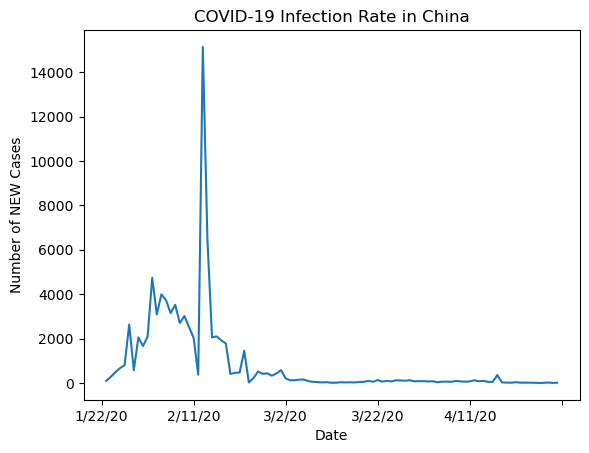

In [50]:
corona_dataset_aggr.loc['China'].diff().plot()

plt.title('COVID-19 Infection Rate in China') 
plt.xlabel('Date')
plt.ylabel('Number of NEW Cases') # not cumulative

### Maxmimum infection rate for countries (China, Spain and Russia)

In [44]:
corona_dataset_aggr.loc['China'].diff().max()

15136.0

In [45]:
corona_dataset_aggr.loc['Spain'].diff().max()

9630.0

In [46]:
corona_dataset_aggr.loc['Russia'].diff().max()

7099.0

### Find maximum Infection Rate for all of the countries. 

In [51]:
countries = list(corona_dataset_aggr.index)
max_infection_rates = []
for country in countries:
    max_infection_rates.append(corona_dataset_aggr.loc[country].diff().max())
corona_dataset_aggr['max_infection_rate'] = max_infection_rates

In [52]:
corona_dataset_aggr.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


### New dataframe with only Country and max IR columns

In [54]:
corona_data = pd.DataFrame(corona_dataset_aggr['max_infection_rate'])
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


### Importing the World Happiness dataset

In [76]:
happiness_report = pd.read_csv("worldwide_happiness_report.csv")

In [77]:
happiness_report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Drop the useless columns 

In [78]:
useless_cols = ['Overall rank', 'Generosity', 'Perceptions of corruption']
happiness_report.drop(useless_cols, axis=1, inplace = True)

In [80]:
happiness_report.head()

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,7.769,1.340,1.587,0.986,0.596
1,Denmark,7.600,1.383,1.573,0.996,0.592
2,Norway,7.554,1.488,1.582,1.028,0.603
3,Iceland,7.494,1.380,1.624,1.026,0.591
4,Netherlands,7.488,1.396,1.522,0.999,0.557


### Changing the indices of the dataframe

In [81]:
happiness_report.set_index("Country or region", inplace = True)
happiness_report.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,,
Finland,7.769,1.340,1.587,0.986,0.596
Denmark,7.600,1.383,1.573,0.996,0.592
Norway,7.554,1.488,1.582,1.028,0.603
Iceland,7.494,1.380,1.624,1.026,0.591
Netherlands,7.488,1.396,1.522,0.999,0.557


### Join two prepared dataset to compare situations in developed and developing countries

#### Corona Dataset :

In [86]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [87]:
corona_data.shape

(187, 1)

#### Wolrd happiness report Dataset :

In [88]:
happiness_report.shape

(156, 5)

In [95]:
happiness_report.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,,
Finland,7.769,1.340,1.587,0.986,0.596
Denmark,7.600,1.383,1.573,0.996,0.592
Norway,7.554,1.488,1.582,1.028,0.603
Iceland,7.494,1.380,1.624,1.026,0.591
Netherlands,7.488,1.396,1.522,0.999,0.557


In [97]:
data = corona_data.join(happiness_report, how = 'inner')
data.head(15)

,max_infection_rate,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,3.203,0.350,0.517,0.361,0.000
Albania,34.0,4.719,0.947,0.848,0.874,0.383
Algeria,199.0,5.211,1.002,1.160,0.785,0.086
Argentina,291.0,6.086,1.092,1.432,0.881,0.471
Armenia,134.0,4.559,0.850,1.055,0.815,0.283
Australia,497.0,7.228,1.372,1.548,1.036,0.557
Austria,1321.0,7.246,1.376,1.475,1.016,0.532
Azerbaijan,105.0,5.208,1.043,1.147,0.769,0.351
Bahrain,301.0,6.199,1.362,1.368,0.871,0.536
Bangladesh,641.0,4.456,0.562,0.928,0.723,0.527


### Correlation matrix #1

In [93]:
data.corr()

,max_infection_rate,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.228783,0.250118,0.191958,0.289263,0.078196
Score,0.228783,1.000000,0.793847,0.788591,0.799893,0.587007
GDP per capita,0.250118,0.793847,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.788591,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.799893,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.587007,0.394603,0.456246,0.427892,1.000000


 - max_infection_rate has **positive correlation** with Score (0.228783), means that more developed countries with **high Score have high COVID-19 IR** too. Most likely this is due to the **development of the healthcare system**. Belgium and Austria have 4 times less population than Afghanistan (although the population density is higher), but many times more **money for case detection and patient care**
 - max_infection_rate as well has **positive correlation** with **GDP per capita** (0.250118) **and Healthy life expectancy** (0.289263). Also markers of **developed healthcare system**, but that also means that wealthy countries have way more **elderly people**, who are more susceptible to infection
 - The correlation of max_infection_rate with Freedom to make life choices (0.078196) is the smallest among all variables. This indicates that the **level of freedom of choice** in a country **has the least influence** on the maximum rate of COVID-19 infection compared to other factors

### Visualization of the results

Text(0, 0.5, 'Infection Rate')

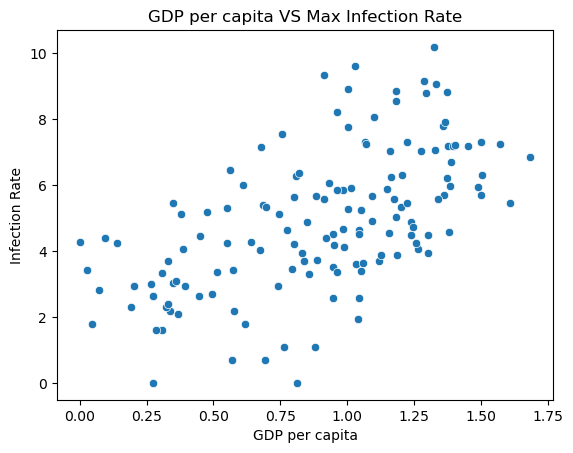

In [115]:
sns.scatterplot(data=data, x='GDP per capita', y=np.log(data['max_infection_rate']))
plt.title('GDP per capita VS Max Infection Rate')
plt.ylabel('Infection Rate')

Text(0, 0.5, 'Infection Rate')

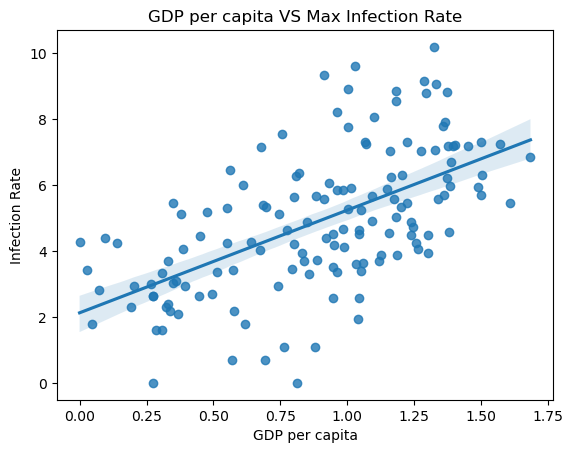

In [114]:
sns.regplot(data = data, x = 'GDP per capita', y = np.log(data['max_infection_rate']))
plt.title('GDP per capita VS Max Infection Rate')
plt.ylabel('Infection Rate')

### Social support VS maximum Infection Rate

Text(0, 0.5, 'Infection Rate')

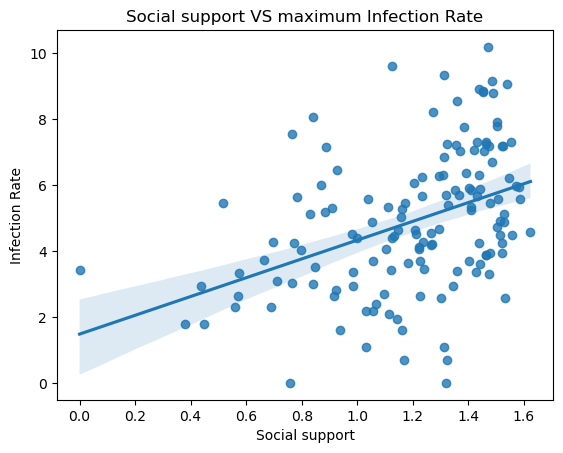

In [113]:
sns.regplot(data = data, x = 'Social support', y = np.log(data['max_infection_rate']))
plt.title('Social support VS maximum Infection Rate')
plt.ylabel('Infection Rate')

### Healthy life expectancy VS maximum Infection Rate

Text(0, 0.5, 'Infection Rate')

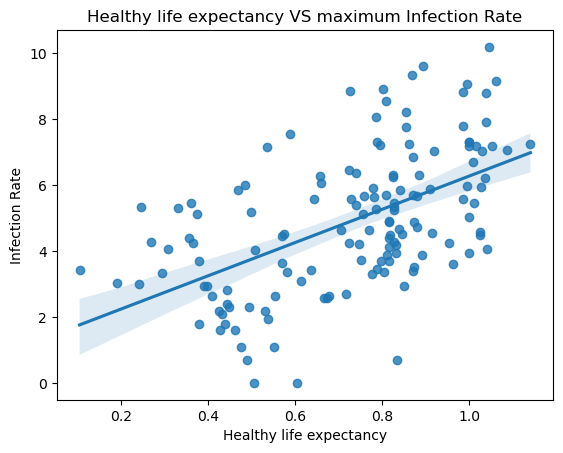

In [117]:
sns.regplot(data = data, x = 'Healthy life expectancy', y = np.log(data['max_infection_rate']))
plt.title('Healthy life expectancy VS maximum Infection Rate')
plt.ylabel('Infection Rate')

### Freedom to make life choices VS maximum Infection Rate

Text(0, 0.5, 'Infection Rate')

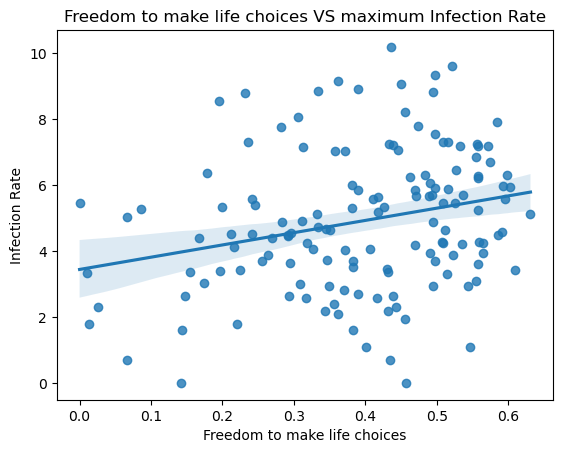

In [121]:
sns.regplot(data = data, x = 'Freedom to make life choices', y = np.log(data['max_infection_rate']))
plt.title('Freedom to make life choices VS maximum Infection Rate')
plt.ylabel('Infection Rate')

###  Importing the Death cases dataset and data preparing

In [136]:
death_dataset = pd.read_csv("/Users/marat/PycharmProjects/pythonProject/covid19_deaths_dataset.csv")
death_dataset.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [137]:
useless_cols = ['Lat', 'Long']
death_dataset.drop(useless_cols, axis=1, inplace = True)

In [138]:
death_dataset.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [139]:
death_dataset_aggr = death_dataset.groupby("Country/Region").sum() # aggregating the rows by the country
death_dataset_aggr.head()

/var/folders/th/zkxn724n2s12m0g5bscf4trh0000gp/T/ipykernel_38493/706965001.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  death_dataset_aggr = death_dataset.groupby("Country/Region").sum() # aggregating the rows by the country


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
Albania,0,0,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
Algeria,0,0,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [141]:
countries = list(death_dataset_aggr.index)
max_death_rates = []
for country in countries:
    max_death_rates.append(death_dataset_aggr.loc[country].diff().max())
death_dataset_aggr['max_death_rate'] = max_death_rates

In [142]:
death_data = pd.DataFrame(death_dataset_aggr['max_death_rate']) # yet another df 
death_data.head()

,max_death_rate
Country/Region,
Afghanistan,168.0
Albania,4.0
Algeria,30.0
Andorra,4.0
Angola,3.0


In [150]:
death_data

,max_death_rate
Country/Region,
Afghanistan,168.0
Albania,4.0
Algeria,30.0
Andorra,4.0
Angola,3.0
...,...
West Bank and Gaza,64.0
Western Sahara,4.0
Yemen,3.0


In [158]:
df = data.join(death_data, how = 'inner')

In [159]:
df

,max_infection_rate,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max_death_rate
Afghanistan,232.0,3.203,0.350,0.517,0.361,0.000,168.0
Albania,34.0,4.719,0.947,0.848,0.874,0.383,4.0
Algeria,199.0,5.211,1.002,1.160,0.785,0.086,30.0
Argentina,291.0,6.086,1.092,1.432,0.881,0.471,73.0
Armenia,134.0,4.559,0.850,1.055,0.815,0.283,102.0
...,...,...,...,...,...,...,...
Venezuela,29.0,4.707,0.960,1.427,0.805,0.154,13.0
Vietnam,19.0,5.175,0.741,1.346,0.851,0.543,19.0
Yemen,5.0,3.380,0.287,1.163,0.463,0.143,3.0
Zambia,9.0,4.107,0.578,1.058,0.426,0.431,6.0


### Correlation matrix #2

In [174]:
df.corr()

,max_infection_rate,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max_death_rate
max_infection_rate,1.000000,0.228783,0.250118,0.191958,0.289263,0.078196,0.663556
Score,0.228783,1.000000,0.793847,0.788591,0.799893,0.587007,0.118291
GDP per capita,0.250118,0.793847,1.000000,0.759468,0.863062,0.394603,0.153714
Social support,0.191958,0.788591,0.759468,1.000000,0.765286,0.456246,0.111899
Healthy life expectancy,0.289263,0.799893,0.863062,0.765286,1.000000,0.427892,0.176273
Freedom to make life choices,0.078196,0.587007,0.394603,0.456246,0.427892,1.000000,0.088107
max_death_rate,0.663556,0.118291,0.153714,0.111899,0.176273,0.088107,1.000000


- As expected, there is a strong positive correlation between **Infection Rate and Death Rate**
- More notably, the correlation between the **Death Rate and GDP per capita or Healthy life expectancy is way less strong**. A **high Death Rate** in developing countries is likely associated with **poor healthcare system** development. **In affluent nations**, COVID-19 Death Rate predominantly affected two key demographics: **the elderly and individuals with underlying health conditions**, such as chronic diseases. These groups constituted a significant proportion of the pandemic's victims.

### Final visualization

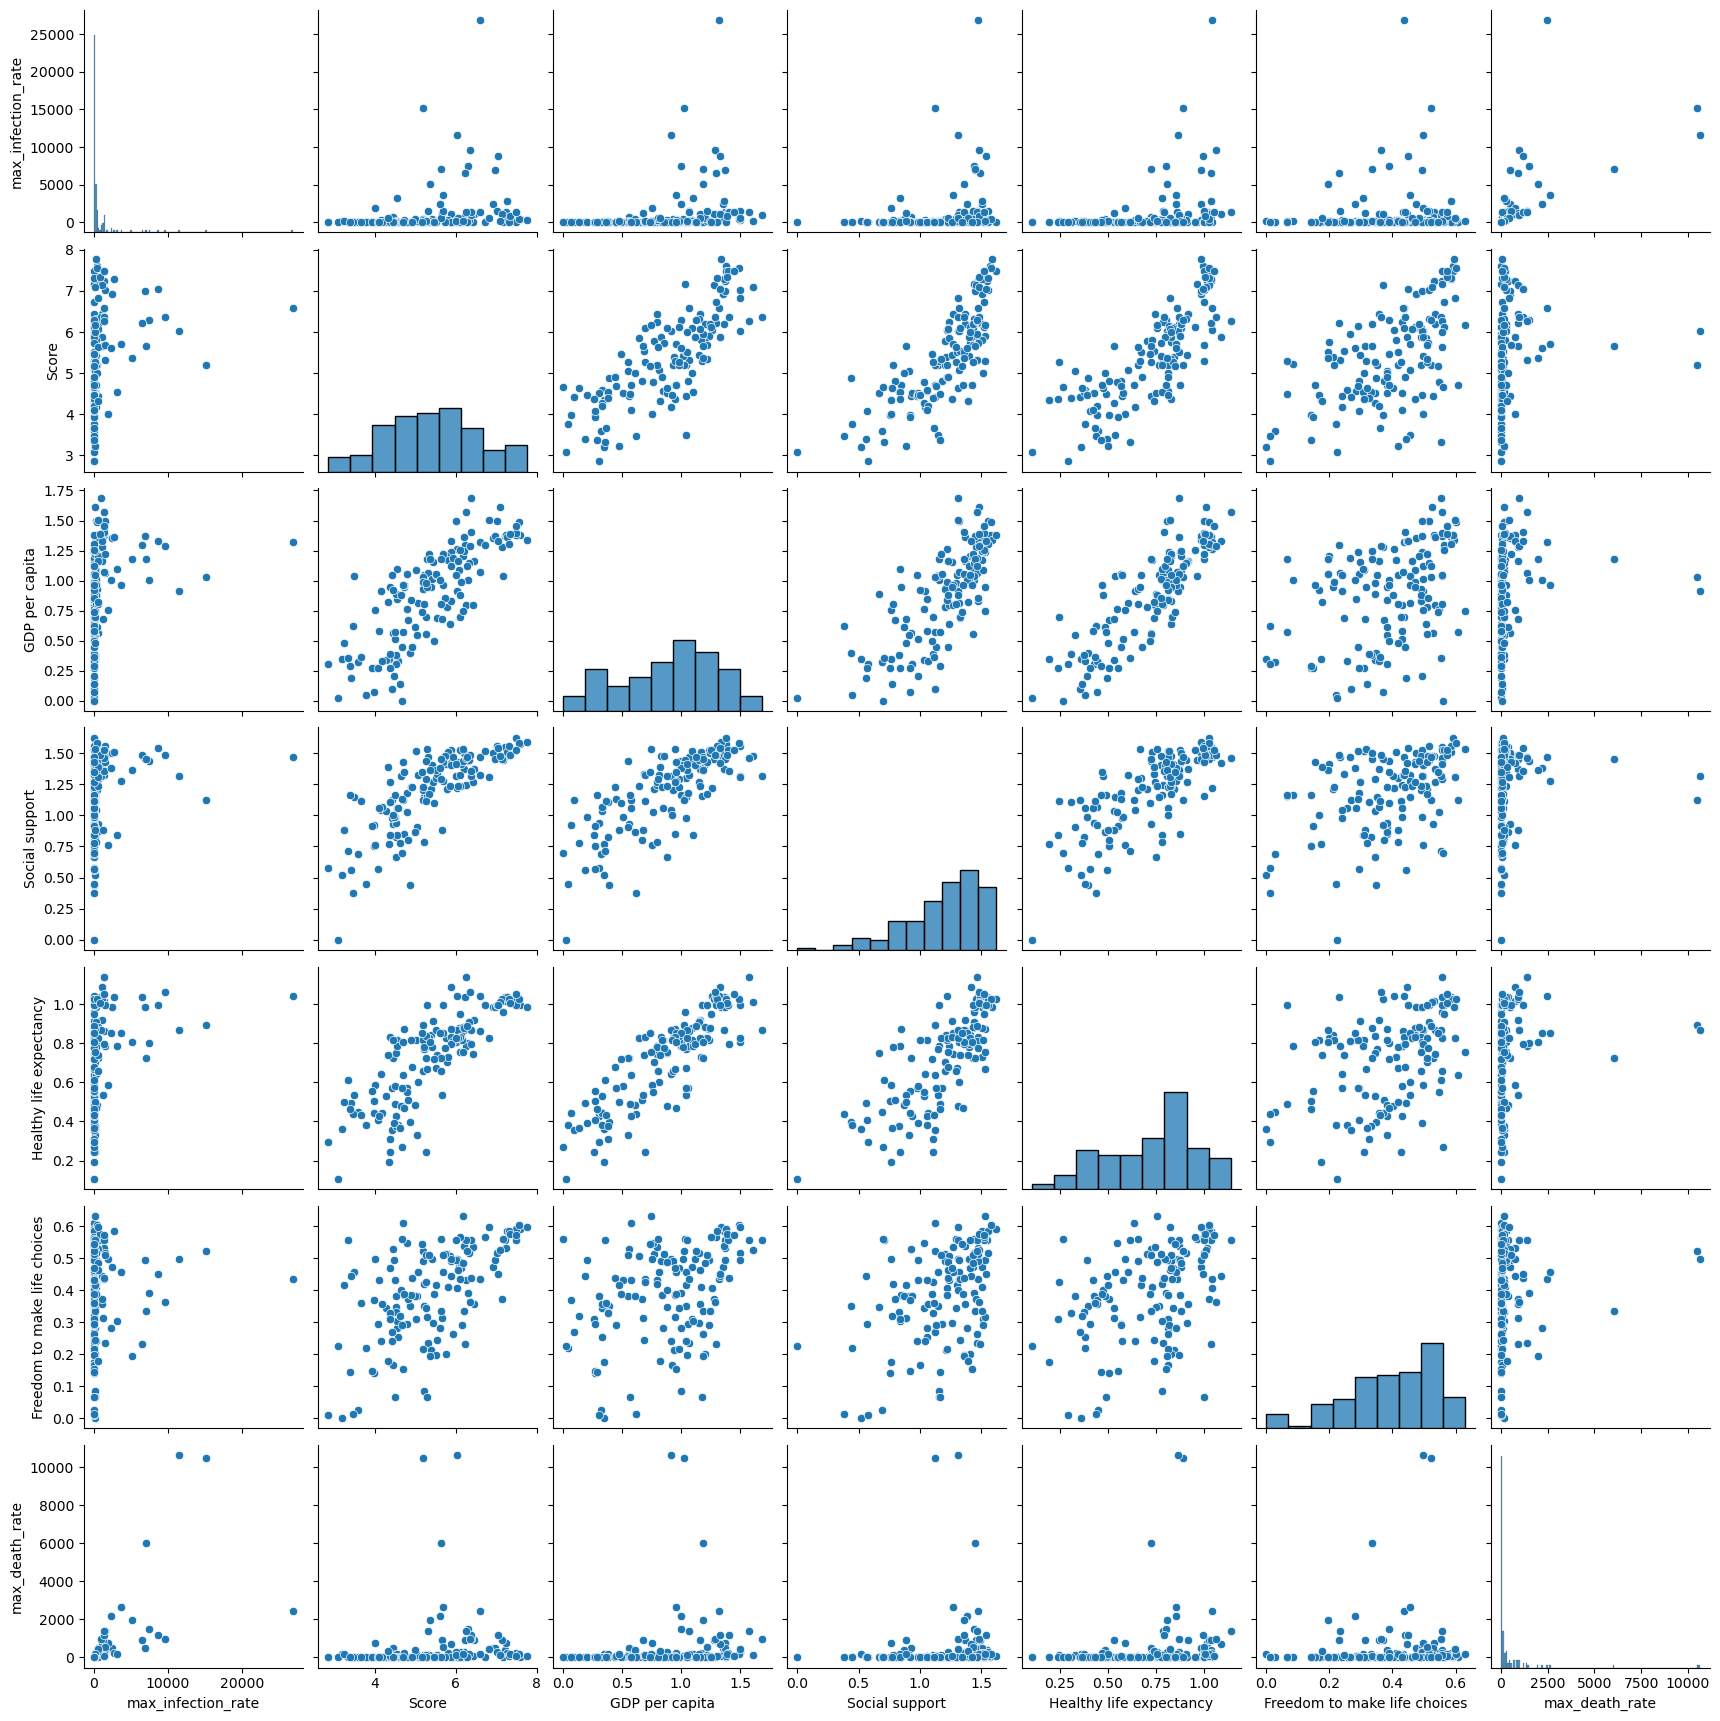

In [162]:
sns.pairplot(df)

Text(0, 0.5, 'Death Rate')

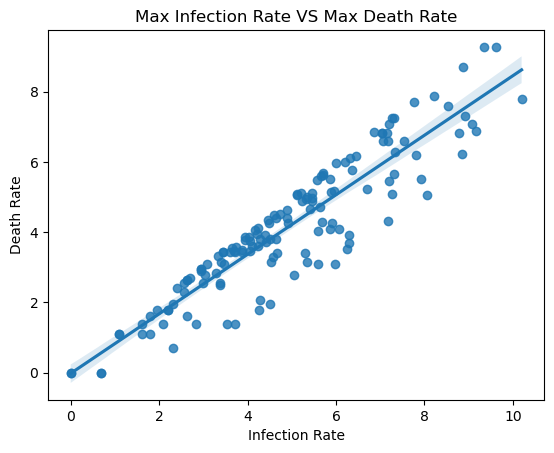

In [171]:
sns.regplot(data = df, x = np.log(df['max_infection_rate']), y = np.log(df['max_death_rate']))
plt.title('Max Infection Rate VS Max Death Rate')
plt.xlabel('Infection Rate')
plt.ylabel('Death Rate')

Text(0, 0.5, 'Death Rate')

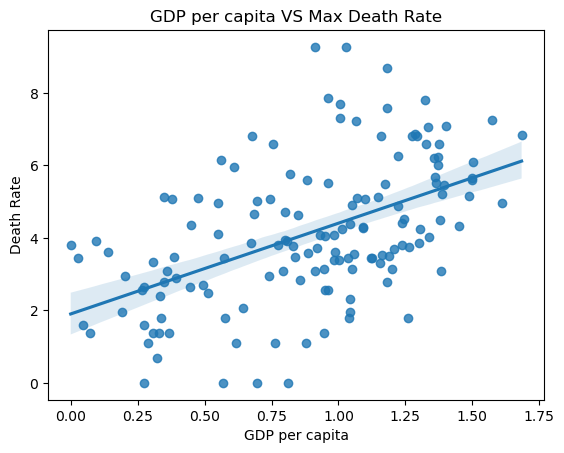

In [172]:
sns.regplot(data = df, x = 'GDP per capita', y = np.log(df['max_death_rate']))
plt.title('GDP per capita VS Max Death Rate')
plt.ylabel('Death Rate')

Text(0, 0.5, 'Death Rate')

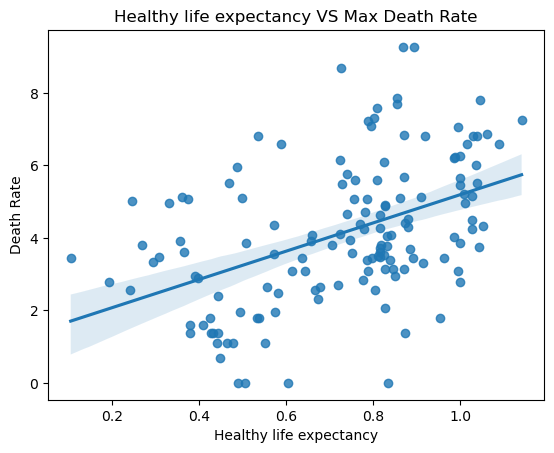

In [173]:
sns.regplot(data = data, x = 'Healthy life expectancy', y = np.log(df['max_death_rate']))
plt.title('Healthy life expectancy VS Max Death Rate')
plt.ylabel('Death Rate')